#Libraries

In [1]:
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
)
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, roc_curve, precision_recall_curve, auc
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
#from pygam import LogisticGAM, s, te  # For GAM (Generalized Additive Models)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data

In [3]:
data = joblib.load('/content/drive/MyDrive/Bankruptcy Prediction Data/Prepared Dataset/Dataset.pkl')
print(data.head())

X = data.drop(columns=['result'])
y = data['result']

   Profitability Ratios (Return from Sales) EBIT/Sales last avail. Year  \
0                                           1.281861                      
1                                           0.022043                      
2                                           3.210585                      
3                                          51.385155                      
4                                          37.085847                      

   Profitability Ratios (Return from Sales) EBIT/Sales last year -1  \
0                                          -0.073507                  
1                                          -0.027587                  
2                                          -2.198620                  
3                                          -2.196863                  
4                                          -2.354131                  

   Profitability Ratios (Return from Sales) EBIT/Sales last year -2  \
0                                           0.03703

In [4]:
data.shape

(255919, 61)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Models

In [6]:
models = {
    "Random Forest 100 depth 20": RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, class_weight={0: 1, 1: 5}),
    "Random Forest 100 depth 10": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight={0: 1, 1: 5}),
    "Random Forest 200 depth 5": RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42, class_weight={0: 1, 1: 5}),
    "Decision Tree depth 10": DecisionTreeClassifier(max_depth=10, random_state=42,criterion='gini', class_weight={0: 1, 1: 5}),
    "Extra Trees depth 10": ExtraTreesClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight={0: 1, 1: 5}),
  }

#Fitting models and Evaluations

In [7]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [8]:
cv_results = {model_name: [] for model_name in models.keys()}
roc_curves_cv = {model_name: [] for model_name in models.keys()}
pr_curves_cv = {model_name: [] for model_name in models.keys()}

Training Random Forest 100 depth 20 with Cross-Validation
Mean Threshold for Random Forest 100 depth 20: 0.35
Training Random Forest 100 depth 10 with Cross-Validation
Mean Threshold for Random Forest 100 depth 10: 0.60
Training Random Forest 200 depth 5 with Cross-Validation
Mean Threshold for Random Forest 200 depth 5: 0.66
Training Decision Tree depth 10 with Cross-Validation
Mean Threshold for Decision Tree depth 10: 0.78
Training Extra Trees depth 10 with Cross-Validation
Mean Threshold for Extra Trees depth 10: 0.58

Cross-validation Metrics for Random Forest 100 depth 20:
  Fold 1:
    Accuracy: 0.9417
    Precision: 0.7429
    Recall: 0.7243
    F1: 0.7334
    ROC AUC: 0.9600
    PR AUC: 0.8043
    Class Accuracies: {'non_bankrupt': 0.9687554930567762, 'bankrupt': 0.7242595204513399}
  Fold 2:
    Accuracy: 0.9358
    Precision: 0.7034
    Recall: 0.7274
    F1: 0.7152
    ROC AUC: 0.9572
    PR AUC: 0.7933
    Class Accuracies: {'non_bankrupt': 0.9617683248374055, 'bankrupt': 

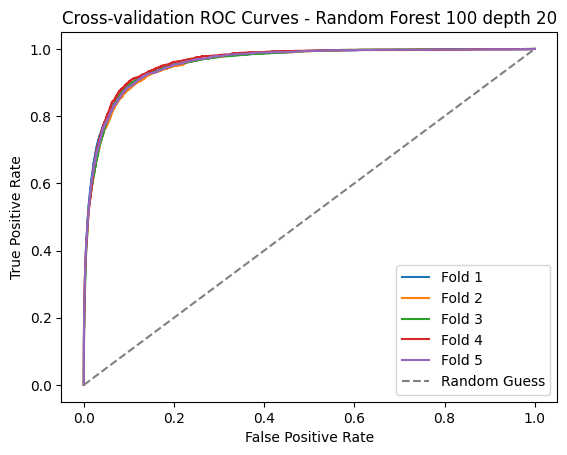

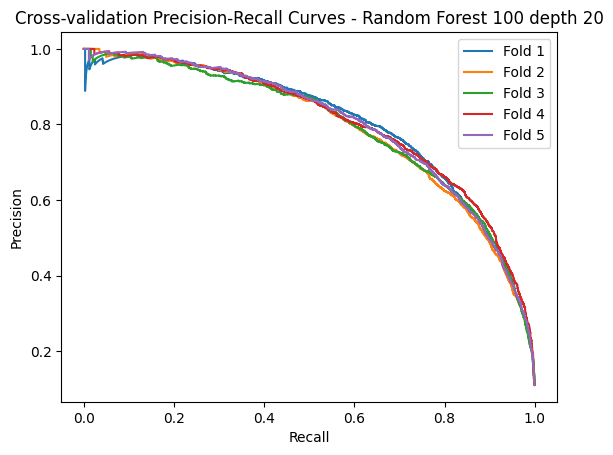


Cross-validation Metrics for Random Forest 100 depth 10:
  Fold 1:
    Accuracy: 0.9370
    Precision: 0.7110
    Recall: 0.7271
    F1: 0.7190
    ROC AUC: 0.9576
    PR AUC: 0.7918
    Class Accuracies: {'non_bankrupt': 0.9631745473721216, 'bankrupt': 0.7270803949224259}
  Fold 2:
    Accuracy: 0.9331
    Precision: 0.6938
    Recall: 0.7102
    F1: 0.7019
    ROC AUC: 0.9548
    PR AUC: 0.7788
    Class Accuracies: {'non_bankrupt': 0.9609333802074178, 'bankrupt': 0.7101551480959097}
  Fold 3:
    Accuracy: 0.9288
    Precision: 0.6515
    Recall: 0.7687
    F1: 0.7053
    ROC AUC: 0.9559
    PR AUC: 0.7826
    Class Accuracies: {'non_bankrupt': 0.9487607663912814, 'bankrupt': 0.768688293370945}
  Fold 4:
    Accuracy: 0.9340
    Precision: 0.6822
    Recall: 0.7571
    F1: 0.7177
    ROC AUC: 0.9592
    PR AUC: 0.7899
    Class Accuracies: {'non_bankrupt': 0.9560555457901213, 'bankrupt': 0.7570521861777151}
  Fold 5:
    Accuracy: 0.9340
    Precision: 0.6910
    Recall: 0.7324
   

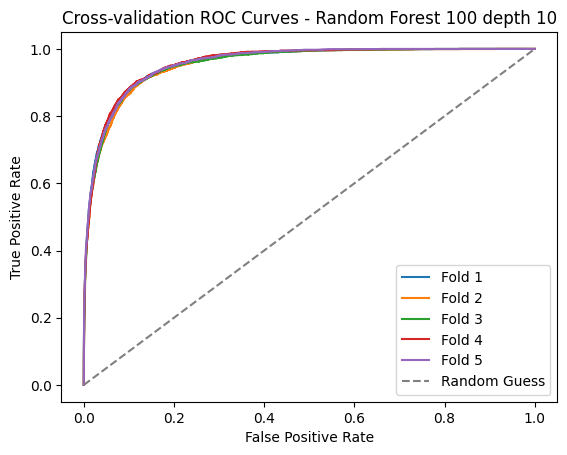

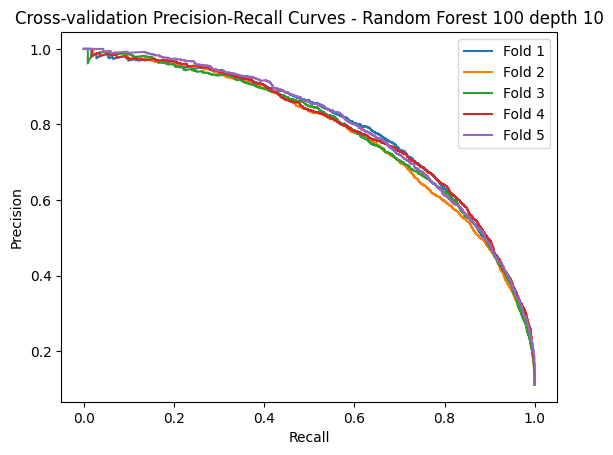


Cross-validation Metrics for Random Forest 200 depth 5:
  Fold 1:
    Accuracy: 0.9273
    Precision: 0.6607
    Recall: 0.7073
    F1: 0.6832
    ROC AUC: 0.9456
    PR AUC: 0.7477
    Class Accuracies: {'non_bankrupt': 0.9547372121638249, 'bankrupt': 0.7073342736248237}
  Fold 2:
    Accuracy: 0.9226
    Precision: 0.6376
    Recall: 0.6992
    F1: 0.6670
    ROC AUC: 0.9427
    PR AUC: 0.7352
    Class Accuracies: {'non_bankrupt': 0.9504746001054667, 'bankrupt': 0.6992242595204513}
  Fold 3:
    Accuracy: 0.9246
    Precision: 0.6528
    Recall: 0.6823
    F1: 0.6672
    ROC AUC: 0.9429
    PR AUC: 0.7375
    Class Accuracies: {'non_bankrupt': 0.9547811566180348, 'bankrupt': 0.6822990126939351}
  Fold 4:
    Accuracy: 0.9295
    Precision: 0.6822
    Recall: 0.6819
    F1: 0.6821
    ROC AUC: 0.9473
    PR AUC: 0.7490
    Class Accuracies: {'non_bankrupt': 0.9604060467568993, 'bankrupt': 0.6819464033850494}
  Fold 5:
    Accuracy: 0.9286
    Precision: 0.6819
    Recall: 0.6675
   

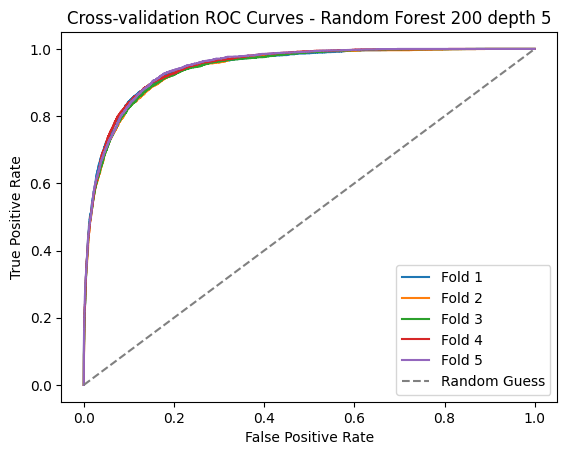

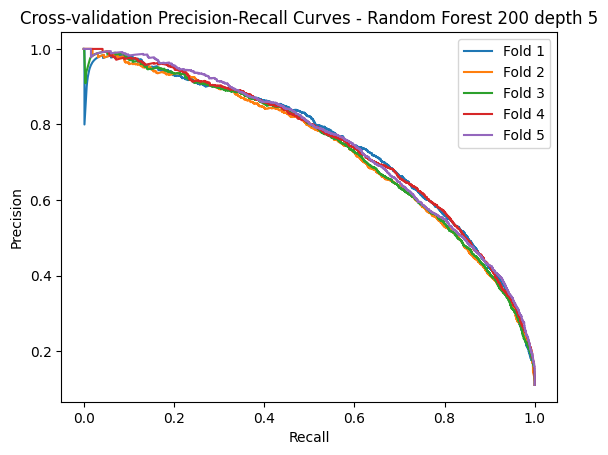


Cross-validation Metrics for Decision Tree depth 10:
  Fold 1:
    Accuracy: 0.9189
    Precision: 0.6158
    Recall: 0.7133
    F1: 0.6610
    ROC AUC: 0.8922
    PR AUC: 0.6074
    Class Accuracies: {'non_bankrupt': 0.944542098787133, 'bankrupt': 0.7133286318758815}
  Fold 2:
    Accuracy: 0.9160
    Precision: 0.6069
    Recall: 0.6855
    F1: 0.6438
    ROC AUC: 0.8855
    PR AUC: 0.5952
    Class Accuracies: {'non_bankrupt': 0.9446739321497627, 'bankrupt': 0.685472496473907}
  Fold 3:
    Accuracy: 0.9173
    Precision: 0.6053
    Recall: 0.7299
    F1: 0.6618
    ROC AUC: 0.8921
    PR AUC: 0.6312
    Class Accuracies: {'non_bankrupt': 0.9406749868166637, 'bankrupt': 0.729901269393512}
  Fold 4:
    Accuracy: 0.9228
    Precision: 0.6410
    Recall: 0.6901
    F1: 0.6646
    ROC AUC: 0.8974
    PR AUC: 0.6044
    Class Accuracies: {'non_bankrupt': 0.951836878185973, 'bankrupt': 0.6900564174894217}
  Fold 5:
    Accuracy: 0.9206
    Precision: 0.6254
    Recall: 0.7063
    F1: 0.

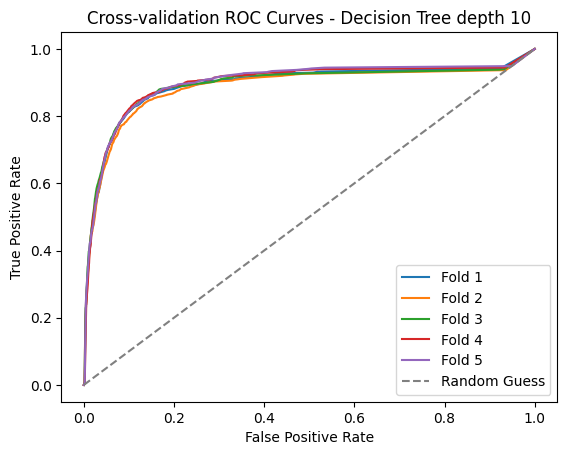

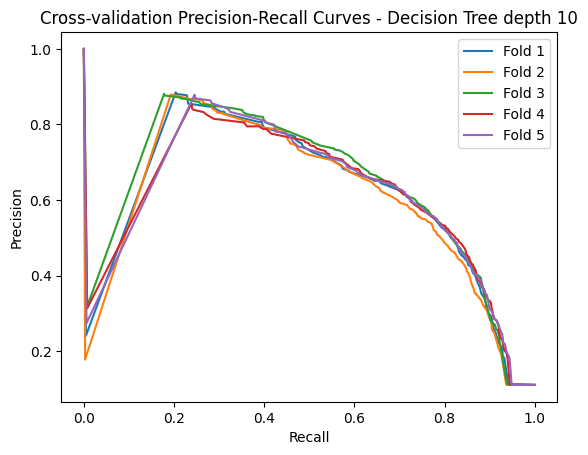


Cross-validation Metrics for Extra Trees depth 10:
  Fold 1:
    Accuracy: 0.9120
    Precision: 0.5929
    Recall: 0.6580
    F1: 0.6238
    ROC AUC: 0.9252
    PR AUC: 0.6685
    Class Accuracies: {'non_bankrupt': 0.9437071541571453, 'bankrupt': 0.657968970380818}
  Fold 2:
    Accuracy: 0.9087
    Precision: 0.5778
    Recall: 0.6548
    F1: 0.6139
    ROC AUC: 0.9226
    PR AUC: 0.6562
    Class Accuracies: {'non_bankrupt': 0.9403673756371946, 'bankrupt': 0.6547954866008463}
  Fold 3:
    Accuracy: 0.9097
    Precision: 0.5845
    Recall: 0.6393
    F1: 0.6106
    ROC AUC: 0.9215
    PR AUC: 0.6513
    Class Accuracies: {'non_bankrupt': 0.9433555985234663, 'bankrupt': 0.639280677009873}
  Fold 4:
    Accuracy: 0.9129
    Precision: 0.5933
    Recall: 0.6819
    F1: 0.6345
    ROC AUC: 0.9291
    PR AUC: 0.6825
    Class Accuracies: {'non_bankrupt': 0.9417296537177008, 'bankrupt': 0.6819464033850494}
  Fold 5:
    Accuracy: 0.9152
    Precision: 0.6115
    Recall: 0.6439
    F1: 0.

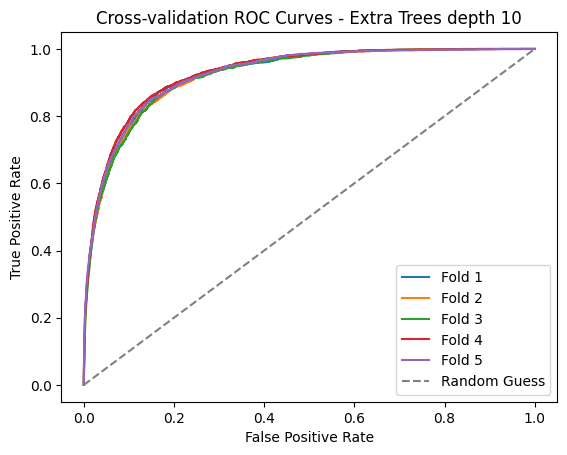

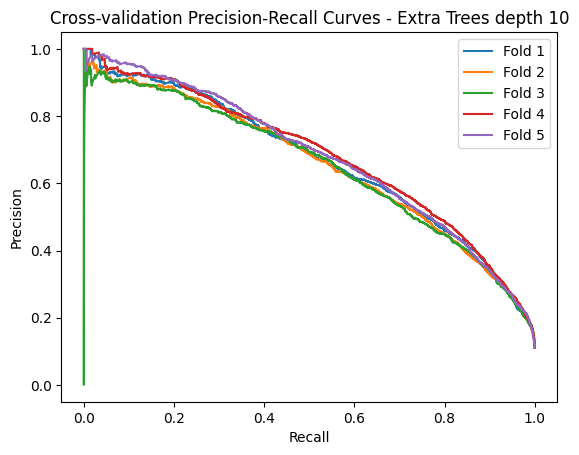


Final Training for Random Forest 100 depth 20

Final Metrics for Random Forest 100 depth 20:
  Accuracy: 0.9410
  Precision: 0.8290
  Recall: 0.5893
  F1 Score: 0.6889
  ROC AUC: 0.9617
  PR AUC: 0.8093
  Class Accuracies: {'non_bankrupt': 0.9848479521884338, 'bankrupt': 0.5892806770098731}


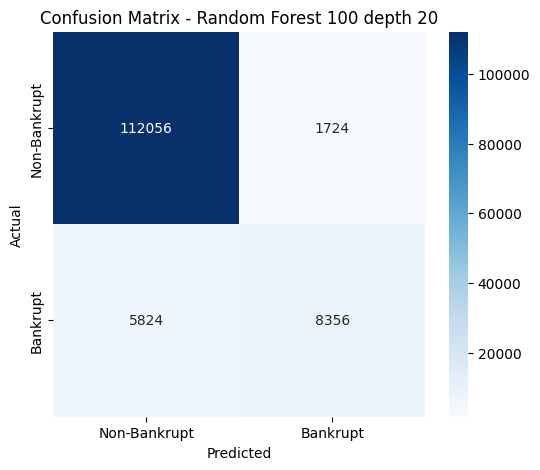

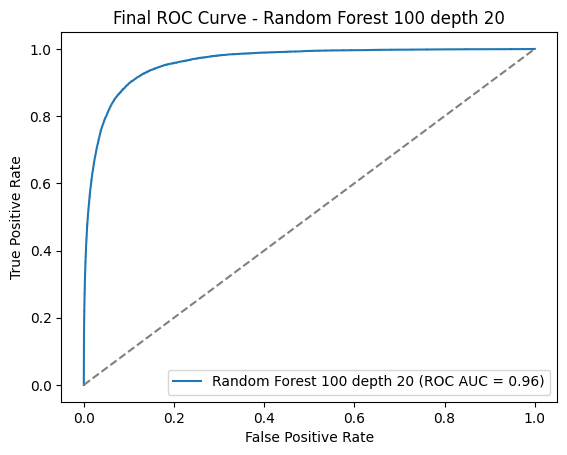

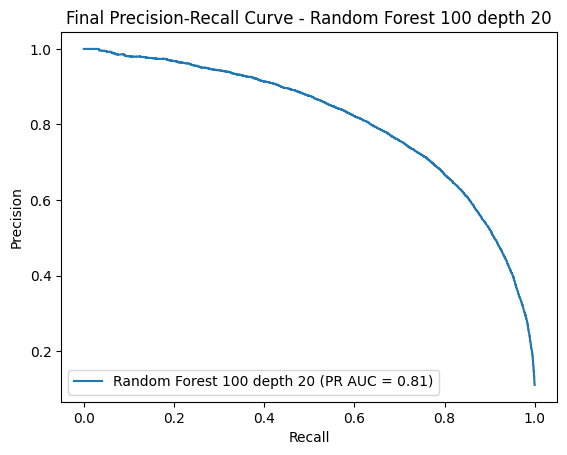


Final Training for Random Forest 100 depth 10

Final Metrics for Random Forest 100 depth 10:
  Accuracy: 0.9328
  Precision: 0.6725
  Recall: 0.7680
  F1 Score: 0.7171
  ROC AUC: 0.9592
  PR AUC: 0.7950
  Class Accuracies: {'non_bankrupt': 0.9533837229741606, 'bankrupt': 0.7679830747531735}


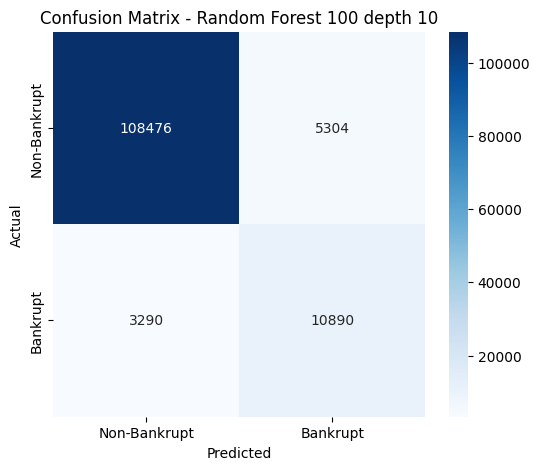

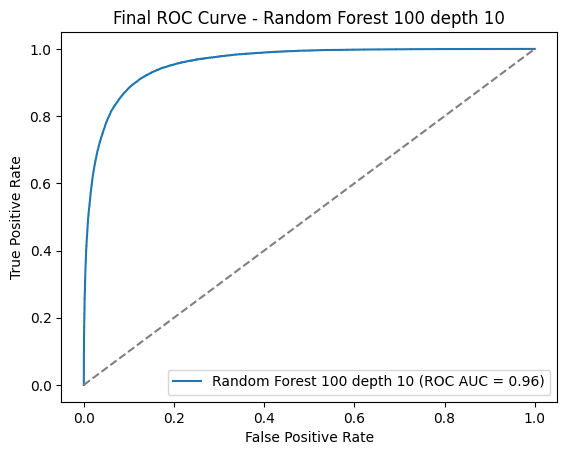

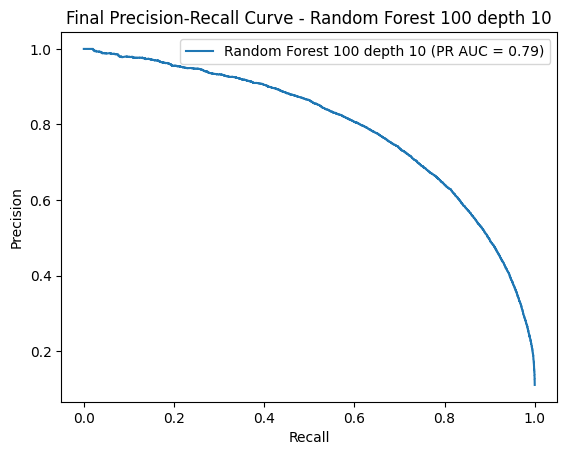


Final Training for Random Forest 200 depth 5

Final Metrics for Random Forest 200 depth 5:
  Accuracy: 0.9154
  Precision: 0.5894
  Recall: 0.7810
  F1 Score: 0.6718
  ROC AUC: 0.9478
  PR AUC: 0.7510
  Class Accuracies: {'non_bankrupt': 0.9322024960449992, 'bankrupt': 0.7809590973201692}


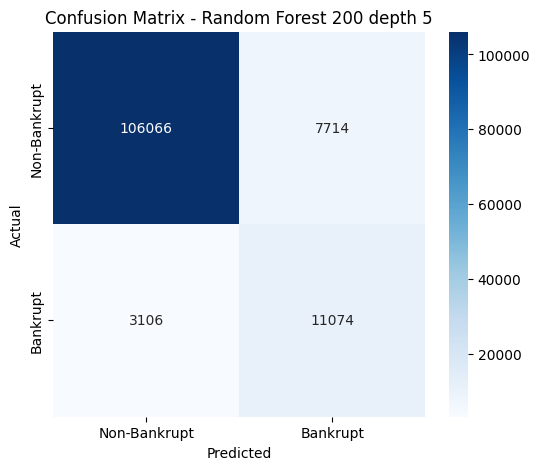

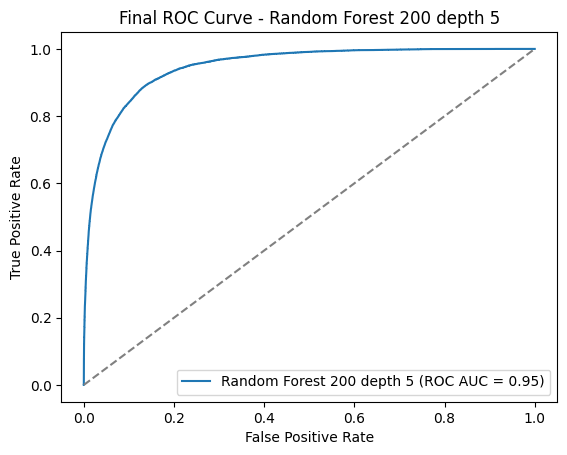

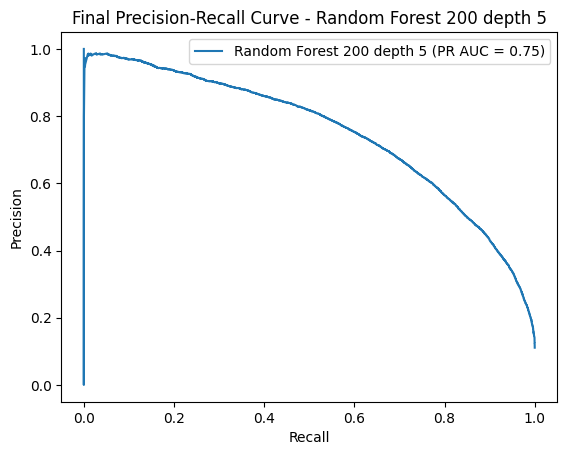


Final Training for Decision Tree depth 10

Final Metrics for Decision Tree depth 10:
  Accuracy: 0.9071
  Precision: 0.5573
  Recall: 0.7866
  F1 Score: 0.6524
  ROC AUC: 0.9040
  PR AUC: 0.6299
  Class Accuracies: {'non_bankrupt': 0.9221392160309368, 'bankrupt': 0.7866008462623413}


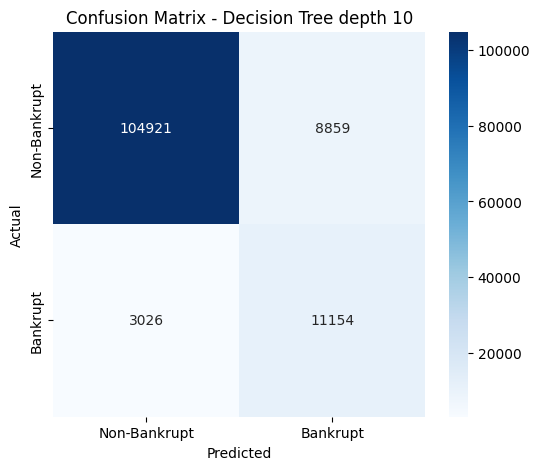

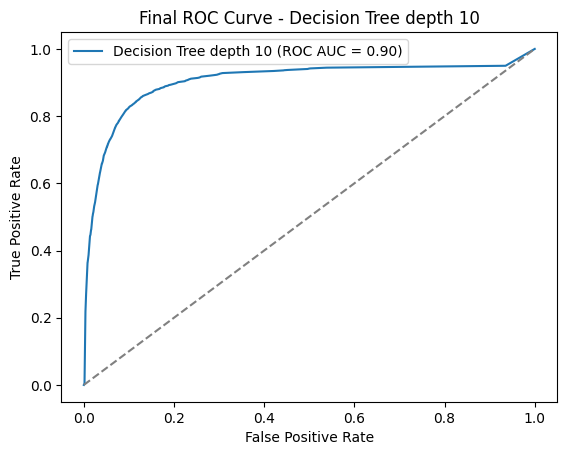

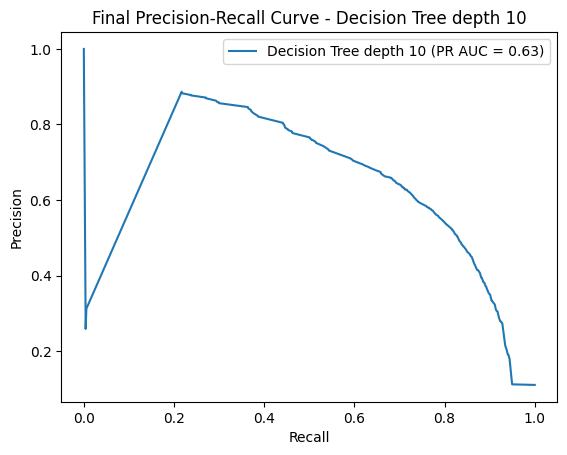


Final Training for Extra Trees depth 10

Final Metrics for Extra Trees depth 10:
  Accuracy: 0.9130
  Precision: 0.5973
  Recall: 0.6592
  F1 Score: 0.6267
  ROC AUC: 0.9264
  PR AUC: 0.6718
  Class Accuracies: {'non_bankrupt': 0.9446124099138689, 'bankrupt': 0.6591678420310296}


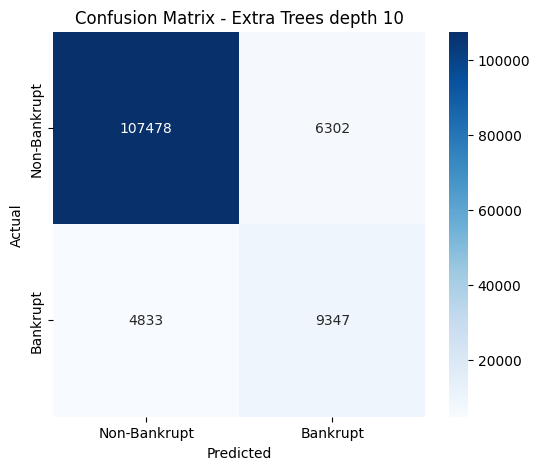

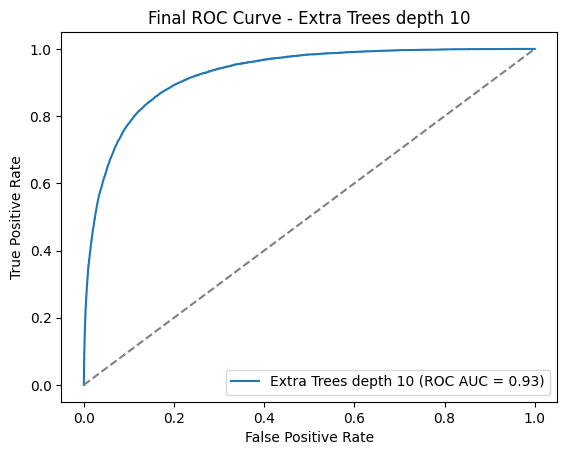

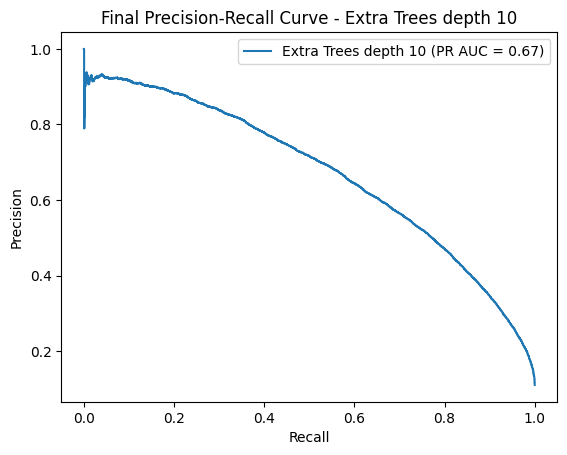

In [9]:
for model_name, model in models.items():
    print(f"Training {model_name} with Cross-Validation")
    thresholds = []

    for fold_idx, (train_index, val_index) in enumerate(cv.split(X_train, y_train)):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train.values[train_index], y_train.values[val_index]

        model.fit(X_fold_train, y_fold_train)

        y_fold_proba = model.predict_proba(X_fold_val)[:, 1]
        best_threshold = 0.5
        best_f1 = 0

        for threshold in np.arange(0.1, 1.0, 0.01):
            y_fold_pred = (y_fold_proba >= threshold).astype(int)
            f1 = f1_score(y_fold_val, y_fold_pred)
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold

        thresholds.append(best_threshold)

        y_fold_pred = (y_fold_proba >= best_threshold).astype(int)

        # Metrics
        accuracy = accuracy_score(y_fold_val, y_fold_pred)
        precision = precision_score(y_fold_val, y_fold_pred)
        recall = recall_score(y_fold_val, y_fold_pred)
        f1 = f1_score(y_fold_val, y_fold_pred)
        roc_auc = roc_auc_score(y_fold_val, y_fold_proba)

        conf_matrix = confusion_matrix(y_fold_val, y_fold_pred)
        class_acc = {
            "non_bankrupt": conf_matrix[0, 0] / conf_matrix[0].sum(),
            "bankrupt": conf_matrix[1, 1] / conf_matrix[1].sum()
        }
        pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_fold_val, y_fold_proba)
        pr_auc = auc(pr_curve_recall, pr_curve_precision)

        cv_results[model_name].append({
            "Fold": fold_idx + 1,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "ROC AUC": roc_auc,
            "PR AUC": pr_auc,
            "Class Accuracies": class_acc
        })

        #curves
        fpr, tpr, _ = roc_curve(y_fold_val, y_fold_proba)
        roc_curves_cv[model_name].append((fpr, tpr))
        pr_curves_cv[model_name].append((pr_curve_precision, pr_curve_recall))

    #mean threshold
    mean_threshold = np.mean(thresholds)
    print(f"Mean Threshold for {model_name}: {mean_threshold:.2f}")

# Display Cross-validation Metrics
for model_name in models.keys():
    print(f"\nCross-validation Metrics for {model_name}:")
    for fold_metrics in cv_results[model_name]:
        print(f"  Fold {fold_metrics['Fold']}:")
        for metric, value in fold_metrics.items():
            if metric != "Fold" and metric != "Class Accuracies":
                print(f"    {metric}: {value:.4f}")
        print(f"    Class Accuracies: {fold_metrics['Class Accuracies']}")

    # Plot cross-validation ROC and PR curves
    plt.figure()
    for fold_idx, (fpr, tpr) in enumerate(roc_curves_cv[model_name]):
        plt.plot(fpr, tpr, label=f"Fold {fold_idx + 1}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
    plt.title(f"Cross-validation ROC Curves - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    plt.figure()
    for fold_idx, (precision, recall) in enumerate(pr_curves_cv[model_name]):
        plt.plot(recall, precision, label=f"Fold {fold_idx + 1}")
    plt.title(f"Cross-validation Precision-Recall Curves - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()

# Final Model Training and Evaluation
final_results = {}
roc_curves_final = {}
pr_curves_final = {}

for model_name, model in models.items():
    print(f"\nFinal Training for {model_name}")
    model.fit(X_train, y_train)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Use the mean threshold from CV
    mean_threshold = np.mean(thresholds)
    y_test_pred = (y_test_proba >= mean_threshold).astype(int)

    # Metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)

    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_acc = {
        "non_bankrupt": conf_matrix[0, 0] / conf_matrix[0].sum(),
        "bankrupt": conf_matrix[1, 1] / conf_matrix[1].sum()
    }
    pr_curve_precision, pr_curve_recall, _ = precision_recall_curve(y_test, y_test_proba)
    pr_auc = auc(pr_curve_recall, pr_curve_precision)

    # Save results
    final_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Class Accuracies": class_acc
    }

    # Display final metrics
    print(f"\nFinal Metrics for {model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  PR AUC: {pr_auc:.4f}")
    print(f"  Class Accuracies: {class_acc}")

     # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Bankrupt', 'Bankrupt'],
                yticklabels=['Non-Bankrupt', 'Bankrupt'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Save final curves
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_curves_final[model_name] = (fpr, tpr)
    pr_curves_final[model_name] = (pr_curve_precision, pr_curve_recall)

    # Plot final curves
    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"Final ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(pr_curve_recall, pr_curve_precision, label=f"{model_name} (PR AUC = {pr_auc:.2f})")
    plt.title(f"Final Precision-Recall Curve - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()

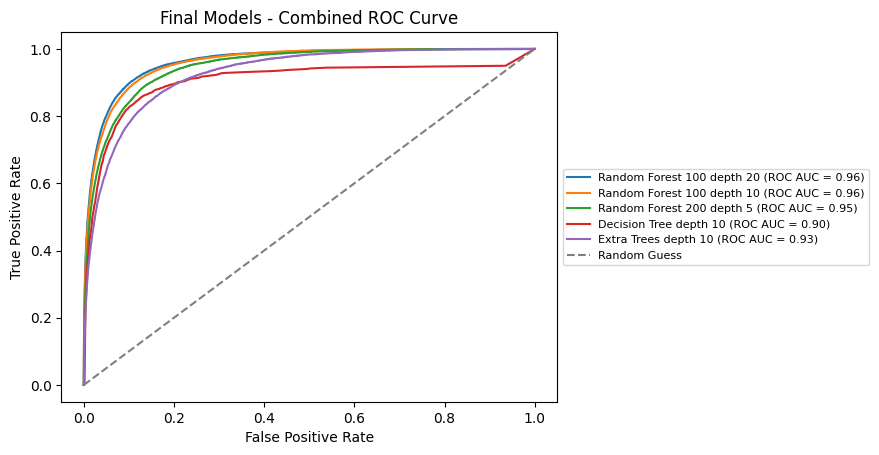

In [10]:
# Combined ROC Curve for Final Models
plt.figure()
for model_name, (fpr, tpr) in roc_curves_final.items():
    plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC = {final_results[model_name]['ROC AUC']:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.title("Final Models - Combined ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=8, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


#Feature Importance

In [11]:
# Feature Importance Storage
feature_importance_results = {}

# Compute Feature Importance for Each Model after Cross-Validation and Evaluation
for model_name, model in models.items():
    # Check if model supports feature importance
    if model_name in ["Random Forest 100 depth 20", "Random Forest 100 depth 10",  "Random Forest 200 depth 5",  "Decision Tree depth 10", "Extra Trees depth 10"]:
        # Feature importance provided directly
        importance = model.feature_importances_


    # If feature importance is available, process and visualize it
    if importance is not None:
        feature_importance_results[model_name] = importance

        # Create a DataFrame for feature importance and sort by importance
        feature_importance_df = pd.DataFrame({
            "Feature": X.columns,
            "Importance": importance
        }).sort_values(by="Importance", ascending=False)

        # Get the top 20 features
        top_features = feature_importance_df



        # Display the top 20 features
        print(f"\nTop 20 Features for {model_name}:")
        print(top_features.to_string(index=False))



Top 20 Features for Random Forest 100 depth 20:
                                                                                      Feature  Importance
                                                      Equity/Total Assets last available year    0.086905
                  Liquidity Ratios (Current Liabilities − Cash)/Total Assets last avail. Year    0.058318
                                              Profit After Taxes/Turnover last available year    0.047285
                   Liquidity Ratios (total liquid funds)/Current Liabilities last avail. Year    0.046484
         Profitability Ratios (Return on Investment) Net Profit/Total Assets last avail. Year    0.045041
                              Solvency Ratios Total Liabilities/Total Assets last avail. Year    0.043764
                                                 Trade Debts/Total Assets last available year    0.041887
                       Liquidity Ratios (total liquid funds)/Current Liabilities last year -1    0.0382

#Decision trees

In [12]:
# Assuming 'models' dictionary contains the trained decision tree as 'Decision Tree'
decision_tree = models["Decision Tree depth 10"]
# Fit the decision tree if not already fitted

# Extract the text-based rules
from sklearn.tree import export_text
tree_rules = export_text(decision_tree, feature_names=list(X.columns), max_depth=5)
print(tree_rules)


|--- Equity/Total Assets last available year <= -0.46
|   |--- Profitability Ratios (Return on Investment) Net Profit/Total Assets last avail. Year <= -0.11
|   |   |--- Liquidity Ratios (Current Liabilities − Cash)/Total Assets last year -1 <= -0.33
|   |   |   |--- Liquidity Ratios (total liquid funds)/Current Liabilities last avail. Year <= -0.09
|   |   |   |   |--- Structure Ratios (Total-Assets-Structure Ratios) Current Assets/Total Assets last year -1 <= -0.06
|   |   |   |   |   |--- Liquidity Ratios (total liquid funds)/Current Liabilities last year -2 <= -0.10
|   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |--- Liquidity Ratios (total liquid funds)/Current Liabilities last year -2 >  -0.10
|   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |--- Structure Ratios (Total-Assets-Structure Ratios) Current Assets/Total Assets last year -1 >  -0.06
|   |   |   |   |   |--- Structure Ratios (Total-Assets-Structure Ratios) Current As

#Random Forest

In [13]:
random_forest = models["Random Forest 100 depth 20"]
from sklearn.tree import export_text
tree_0 = random_forest.estimators_[0]
tree_rules = export_text(tree_0, feature_names=list(X.columns), max_depth=5)
print(tree_rules)


|--- Current Liabilities/Total Assets last available year <= 0.66
|   |--- Liquidity Ratios (total liquid funds)/Current Liabilities last year -2 <= -0.10
|   |   |--- Structure Ratios (Total-Assets-Structure Ratios) Current Assets/Total Assets last year -2 <= -1.52
|   |   |   |--- Profitability Ratios (Return from Sales) EBIT/Sales last avail. Year <= 0.08
|   |   |   |   |--- Accounts Receivable/Total Assets last year -2 <= -1.17
|   |   |   |   |   |--- Profitability Ratios (Return on Investment) Gross Profit/Total Assets last year -1 <= -0.82
|   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |--- Profitability Ratios (Return on Investment) Gross Profit/Total Assets last year -1 >  -0.82
|   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |--- Accounts Receivable/Total Assets last year -2 >  -1.17
|   |   |   |   |   |--- Liquidity Ratios (total liquid funds)/Current Liabilities last year -2 <= -0.10
|   |   |   |   |   |   |--- trunc

In [14]:
random_forest = models["Random Forest 100 depth 10"]
from sklearn.tree import export_text
tree_0 = random_forest.estimators_[0]
tree_rules = export_text(tree_0, feature_names=list(X.columns), max_depth=5)
print(tree_rules)


|--- Current Liabilities/Total Assets last available year <= 0.66
|   |--- Liquidity Ratios (total liquid funds)/Current Liabilities last year -2 <= -0.10
|   |   |--- Structure Ratios (Total-Assets-Structure Ratios) Current Assets/Total Assets last year -2 <= -1.52
|   |   |   |--- Profitability Ratios (Return from Sales) EBIT/Sales last avail. Year <= 0.08
|   |   |   |   |--- Accounts Receivable/Total Assets last year -2 <= -1.17
|   |   |   |   |   |--- Profitability Ratios (Return on Investment) Gross Profit/Total Assets last year -1 <= -0.82
|   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |--- Profitability Ratios (Return on Investment) Gross Profit/Total Assets last year -1 >  -0.82
|   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |--- Accounts Receivable/Total Assets last year -2 >  -1.17
|   |   |   |   |   |--- Activity Ratios (Assets Turnover) Sales/Total Assets last year -2 <= -0.73
|   |   |   |   |   |   |--- truncated 

In [15]:
random_forest = models["Random Forest 200 depth 5"]
from sklearn.tree import export_text
tree_0 = random_forest.estimators_[0]
tree_rules = export_text(tree_0, feature_names=list(X.columns), max_depth=5)
print(tree_rules)


|--- Current Liabilities/Total Assets last available year <= 0.66
|   |--- Liquidity Ratios (total liquid funds)/Current Liabilities last year -2 <= -0.10
|   |   |--- Structure Ratios (Total-Assets-Structure Ratios) Current Assets/Total Assets last year -2 <= -1.52
|   |   |   |--- Profitability Ratios (Return from Sales) EBIT/Sales last avail. Year <= 0.08
|   |   |   |   |--- Accounts Receivable/Total Assets last year -2 <= -1.17
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Accounts Receivable/Total Assets last year -2 >  -1.17
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- Profitability Ratios (Return from Sales) EBIT/Sales last avail. Year >  0.08
|   |   |   |   |--- Profitability Ratios (Return on Investment) Net Profit/Total Assets last avail. Year <= -0.16
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Profitability Ratios (Return on Investment) Net Profit/Total Assets last avail. Year >  -0.16
|   |   |   |   |   |--- class: 0.0
|   |   |--- Struct

#22

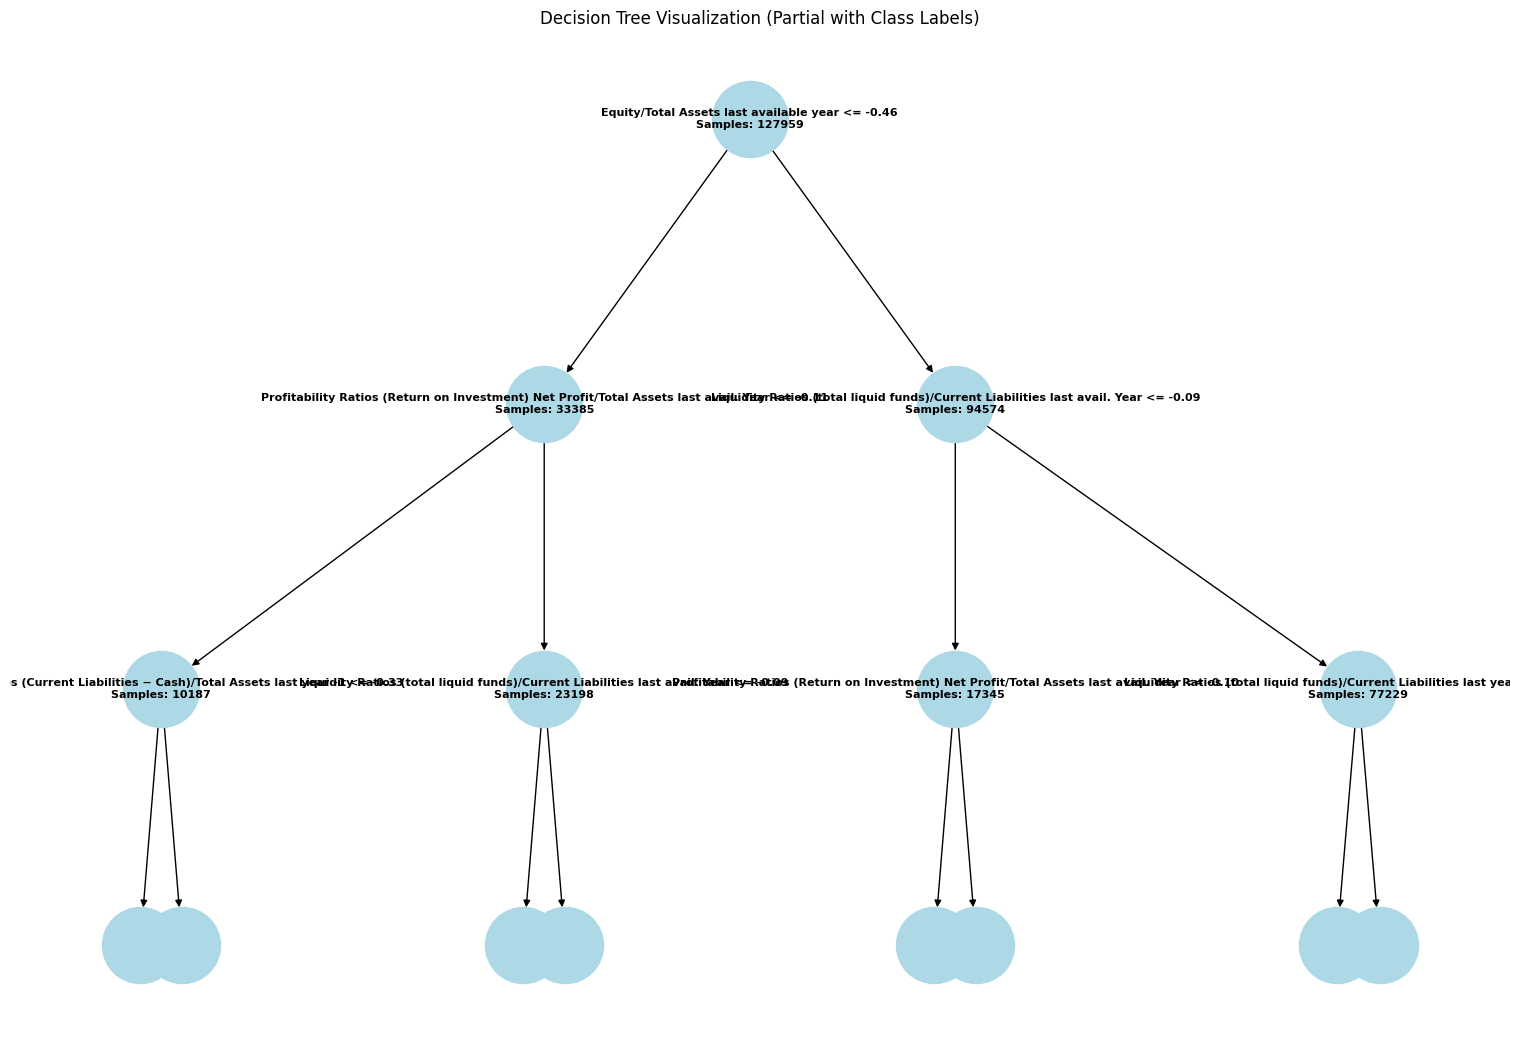

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.tree import _tree

def add_nodes_edges(graph, tree, feature_names, node_id=0, depth=0, max_depth=3):
    """
    Recursively add nodes and edges from a decision tree to a graph, with depth limit.
    """
    if depth >= max_depth:
        return

    # Check if the current node is a leaf
    if tree.feature[node_id] == _tree.TREE_UNDEFINED:
        class_val = tree.value[node_id].argmax()  # Get the predicted class
        samples = int(tree.value[node_id].sum())  # Number of samples in the leaf
        graph.add_node(node_id, label=f"Class: {class_val}\nSamples: {samples}")
        return

    # Add the current node
    feature = feature_names[tree.feature[node_id]]
    threshold = tree.threshold[node_id]
    node_label = f"{feature} <= {threshold:.2f}\nSamples: {tree.n_node_samples[node_id]}"
    graph.add_node(node_id, label=node_label)

    # Add edges to children
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    # Recursive calls for children
    graph.add_edge(node_id, left_child)
    add_nodes_edges(graph, tree, feature_names, left_child, depth + 1, max_depth)

    graph.add_edge(node_id, right_child)
    add_nodes_edges(graph, tree, feature_names, right_child, depth + 1, max_depth)

# Create the graph
graph = nx.DiGraph()

# Build the graph with a depth limit (example: 3 levels deep)
add_nodes_edges(graph, decision_tree.tree_, feature_names=list(X.columns), max_depth=3)

# Generate a hierarchical layout
pos = nx.nx_pydot.graphviz_layout(graph, prog="dot")

# Plot the graph
plt.figure(figsize=(15, 10))
nx.draw(
    graph,
    pos,
    with_labels=True,
    labels=nx.get_node_attributes(graph, 'label'),
    node_size=3000,
    node_color="lightblue",
    font_size=8,
    font_weight="bold"
)
plt.title("Decision Tree Visualization (Partial with Class Labels)")
plt.show()


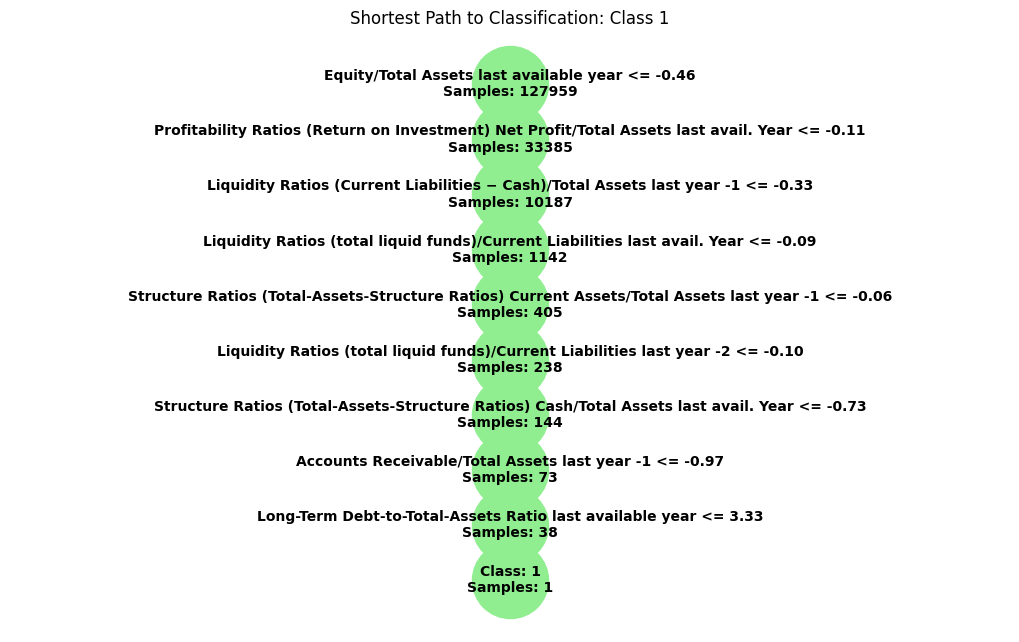

In [17]:
def add_nodes_edges(graph, tree, feature_names, node_id=0, depth=0, max_depth=10):
    """
    Recursively add nodes and edges from a decision tree to a graph, with depth limit.
    """
    if depth >= max_depth:
        return

    # Check if the current node is a leaf
    if tree.feature[node_id] == _tree.TREE_UNDEFINED:
        samples = int(tree.value[node_id].sum())  # Number of samples in the leaf
        if samples > 0:  # Exclude nodes with 0 samples
            class_val = tree.value[node_id].argmax()  # Predicted class
            graph.add_node(node_id, label=f"Class: {class_val}\nSamples: {samples}", is_leaf=True, class_val=class_val)
        return

    # Add the current node
    feature = feature_names[tree.feature[node_id]]
    threshold = tree.threshold[node_id]
    samples = int(tree.n_node_samples[node_id])  # Number of samples at this node

    # Exclude nodes with 0 samples
    if samples > 0:
        node_label = f"{feature} <= {threshold:.2f}\nSamples: {samples}"
        graph.add_node(node_id, label=node_label, is_leaf=False)

        # Add edges to children
        left_child = tree.children_left[node_id]
        right_child = tree.children_right[node_id]

        graph.add_edge(node_id, left_child)
        add_nodes_edges(graph, tree, feature_names, left_child, depth + 1, max_depth)

        graph.add_edge(node_id, right_child)
        add_nodes_edges(graph, tree, feature_names, right_child, depth + 1, max_depth)

# Create the graph
graph = nx.DiGraph()

# Build the graph for the full tree
add_nodes_edges(graph, decision_tree.tree_, feature_names=list(X.columns), max_depth=10)

# Find the shortest path to a specific class (e.g., Class: 1) with non-zero samples
def find_significant_path(graph, class_val, min_samples=1):
    for node, attrs in graph.nodes(data=True):
        if attrs.get("is_leaf") and attrs.get("class_val") == class_val and int(attrs['label'].split('\n')[1].split(': ')[1]) >= min_samples:
            return nx.shortest_path(graph, source=0, target=node)
    return None

target_class = 1
shortest_path = find_significant_path(graph, target_class)

# Create a subgraph for the shortest path
if shortest_path:
    subgraph = graph.subgraph(shortest_path)
    pos = nx.nx_pydot.graphviz_layout(subgraph, prog="dot")

    # Plot the subgraph
    plt.figure(figsize=(10, 6))
    nx.draw(
        subgraph,
        pos,
        with_labels=True,
        labels=nx.get_node_attributes(subgraph, 'label'),
        node_size=3000,
        node_color="lightgreen",
        font_size=10,
        font_weight="bold"
    )
    plt.title(f"Shortest Path to Classification: Class {target_class}")
    plt.show()
else:
    print(f"No path found to Class {target_class} with non-zero samples.")


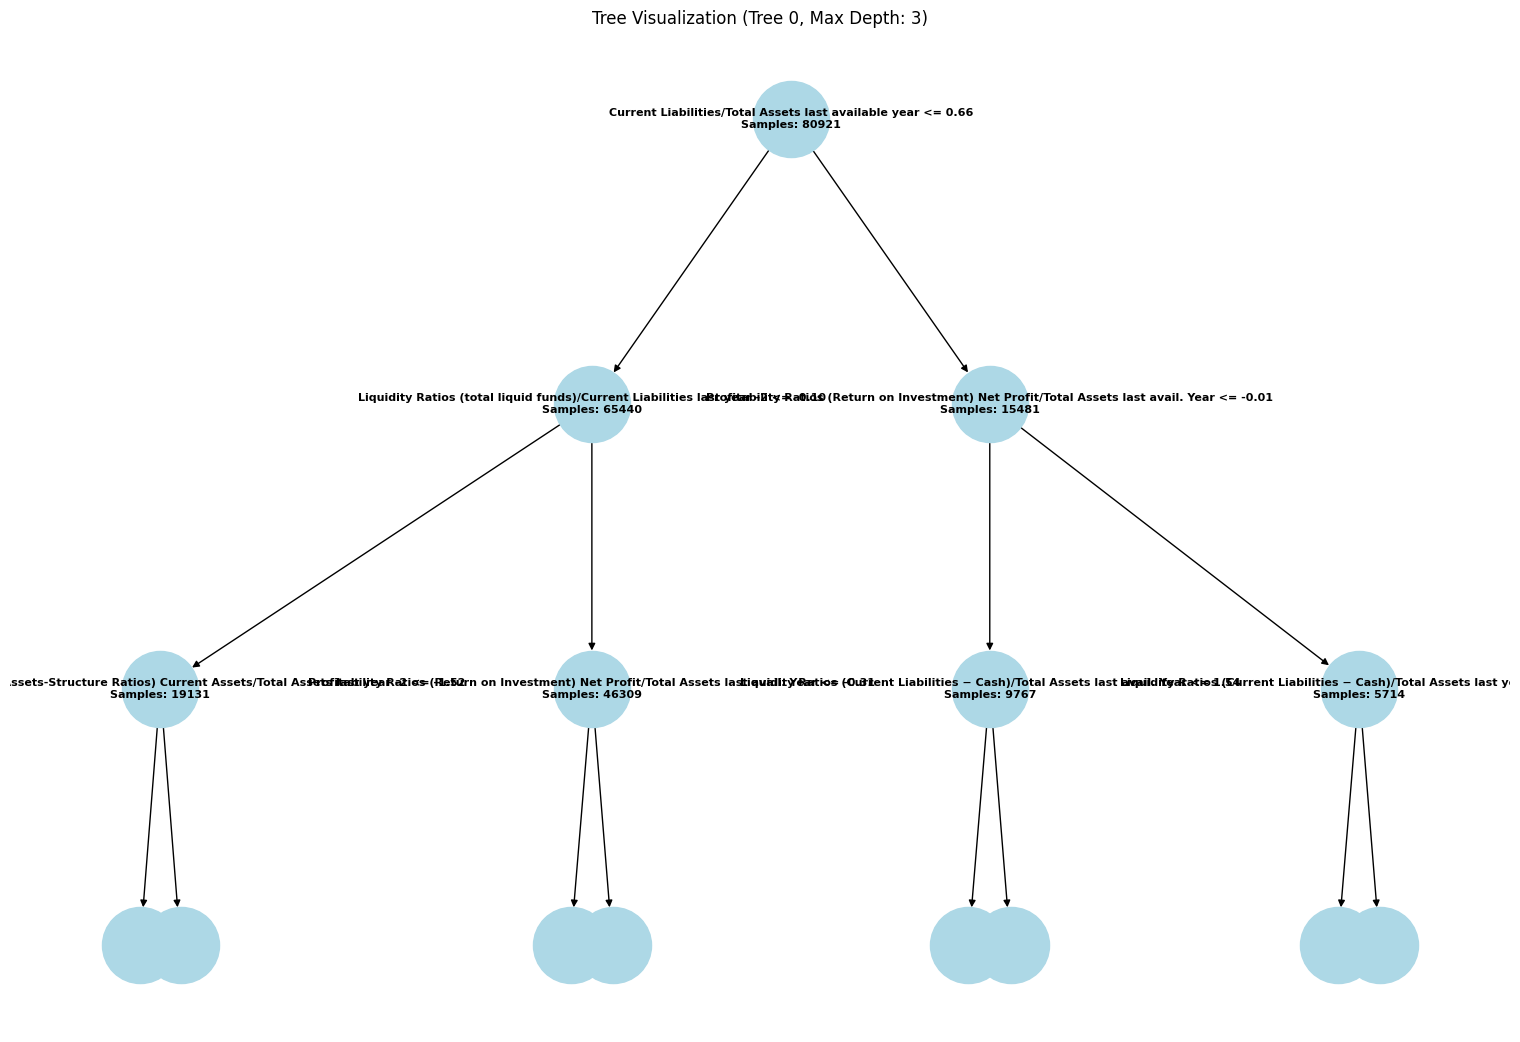

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.tree import _tree

def add_nodes_edges(graph, tree, feature_names, node_id=0, depth=0, max_depth=3):
    """
    Recursively add nodes and edges from a decision tree to a graph, with depth limit.
    """
    if depth >= max_depth:
        return

    # Check if the current node is a leaf
    if tree.feature[node_id] == _tree.TREE_UNDEFINED:
        class_val = tree.value[node_id].argmax()  # Get the predicted class
        samples = int(tree.value[node_id].sum())  # Number of samples in the leaf
        graph.add_node(node_id, label=f"Class: {class_val}\nSamples: {samples}")
        return

    # Add the current node
    feature = feature_names[tree.feature[node_id]]
    threshold = tree.threshold[node_id]
    node_label = f"{feature} <= {threshold:.2f}\nSamples: {tree.n_node_samples[node_id]}"
    graph.add_node(node_id, label=node_label)

    # Add edges to children
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    # Recursive calls for children
    graph.add_edge(node_id, left_child)
    add_nodes_edges(graph, tree, feature_names, left_child, depth + 1, max_depth)

    graph.add_edge(node_id, right_child)
    add_nodes_edges(graph, tree, feature_names, right_child, depth + 1, max_depth)

def plot_tree_graph(model, feature_names, tree_index=0, max_depth=3):
    """
    Visualize a single tree from a model (ensemble or standalone decision tree).
    """
    graph = nx.DiGraph()

    if hasattr(model, "estimators_"):  # If model is an ensemble
        tree = model.estimators_[tree_index].tree_
    else:  # If model is a single decision tree
        tree = model.tree_

    # Add nodes and edges
    add_nodes_edges(graph, tree, feature_names, max_depth=max_depth)

    # Generate hierarchical layout
    pos = nx.nx_pydot.graphviz_layout(graph, prog="dot")

    # Plot the graph
    plt.figure(figsize=(15, 10))
    nx.draw(
        graph,
        pos,
        with_labels=True,
        labels=nx.get_node_attributes(graph, 'label'),
        node_size=3000,
        node_color="lightblue",
        font_size=8,
        font_weight="bold"
    )
    plt.title(f"Tree Visualization (Tree {tree_index}, Max Depth: {max_depth})")
    plt.show()

# Example: Plot a tree from the Random Forest model
model_name = "Random Forest 100 depth 20"
feature_names = list(X.columns)  # Replace with your actual feature names
plot_tree_graph(models[model_name], feature_names, tree_index=0, max_depth=3)


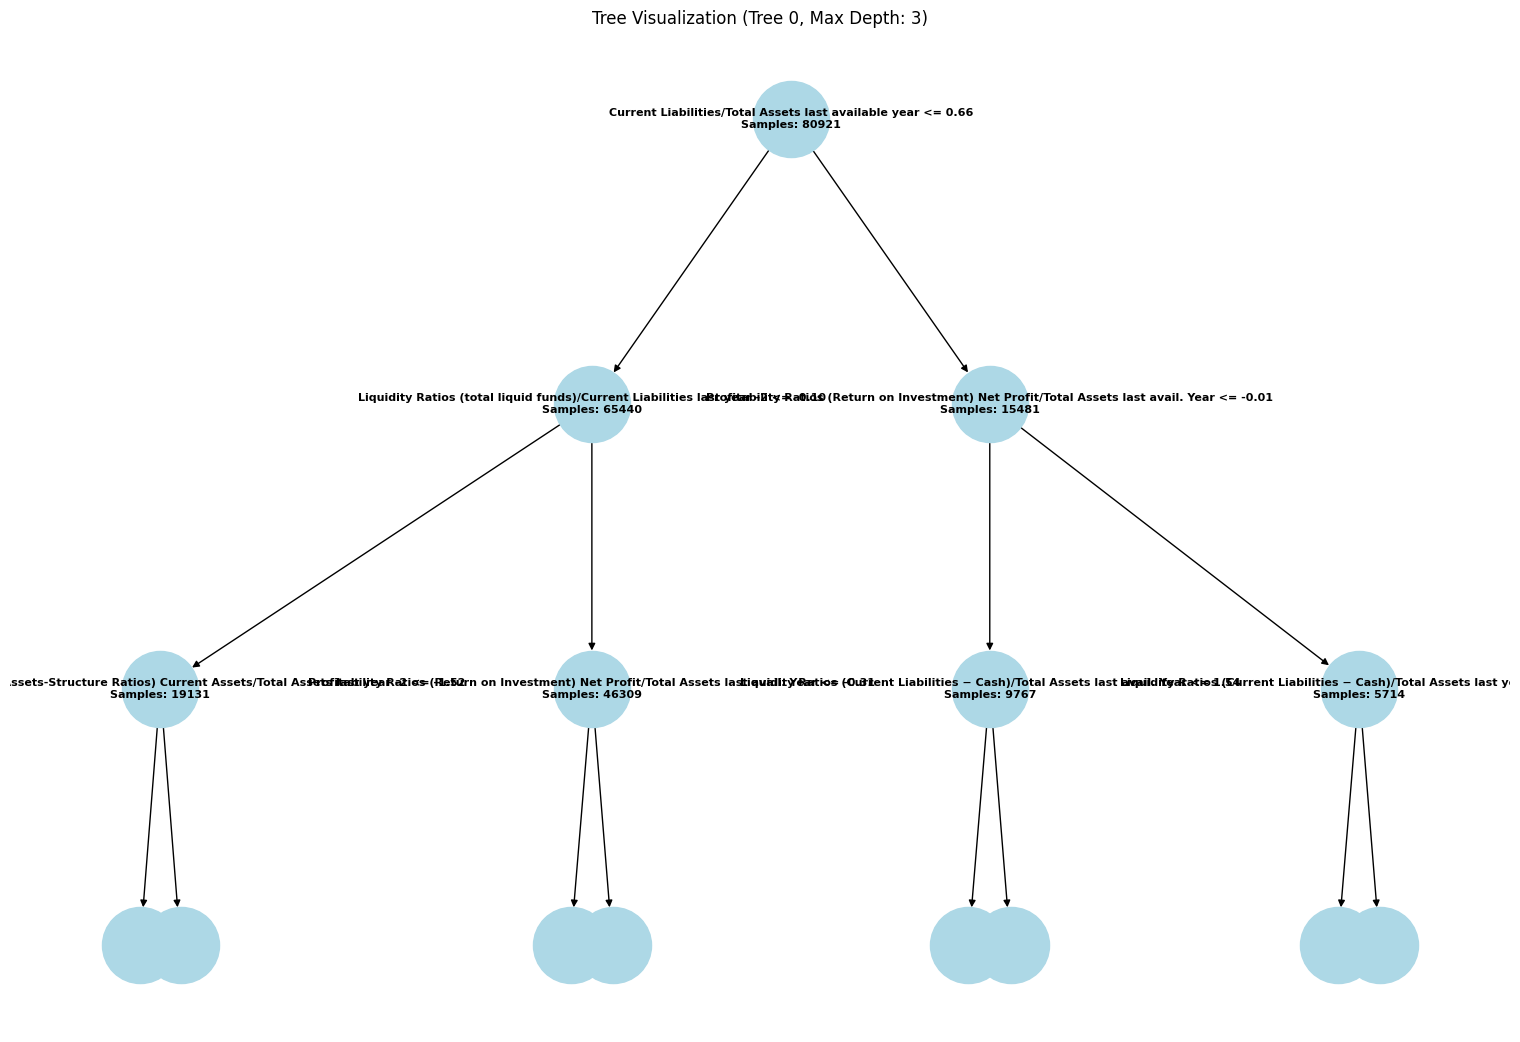

In [26]:
plot_tree_graph(models["Random Forest 100 depth 20"], feature_names, tree_index=0, max_depth=3)


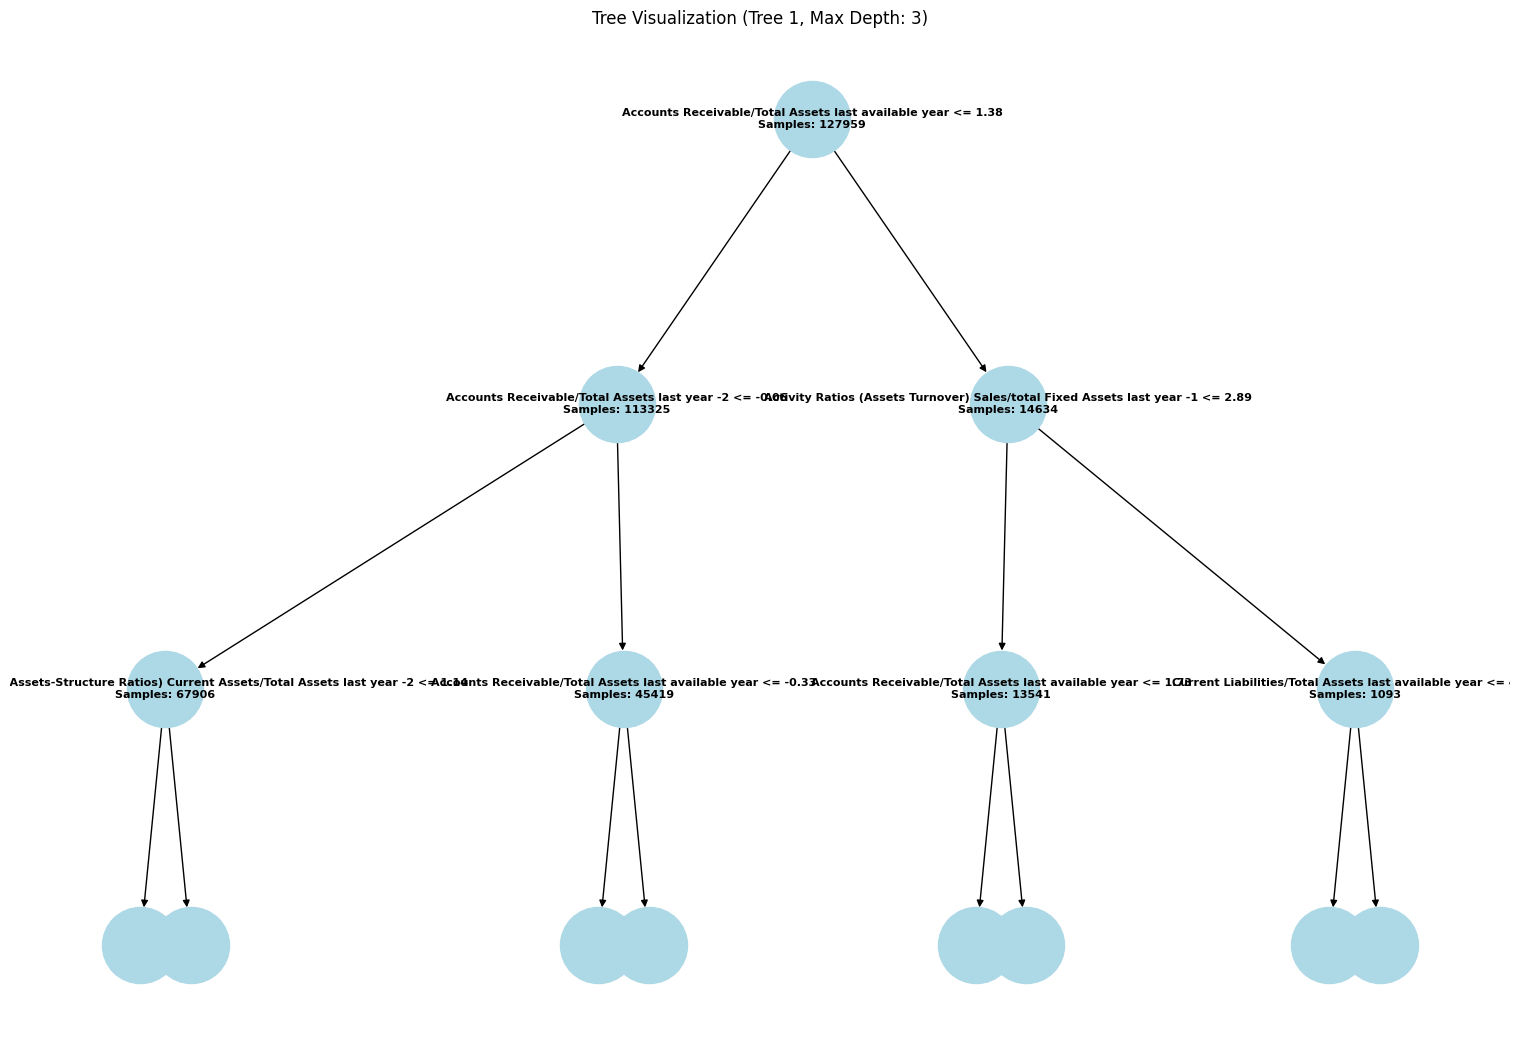

In [20]:
plot_tree_graph(models["Extra Trees depth 10"], feature_names, tree_index=1, max_depth=3)


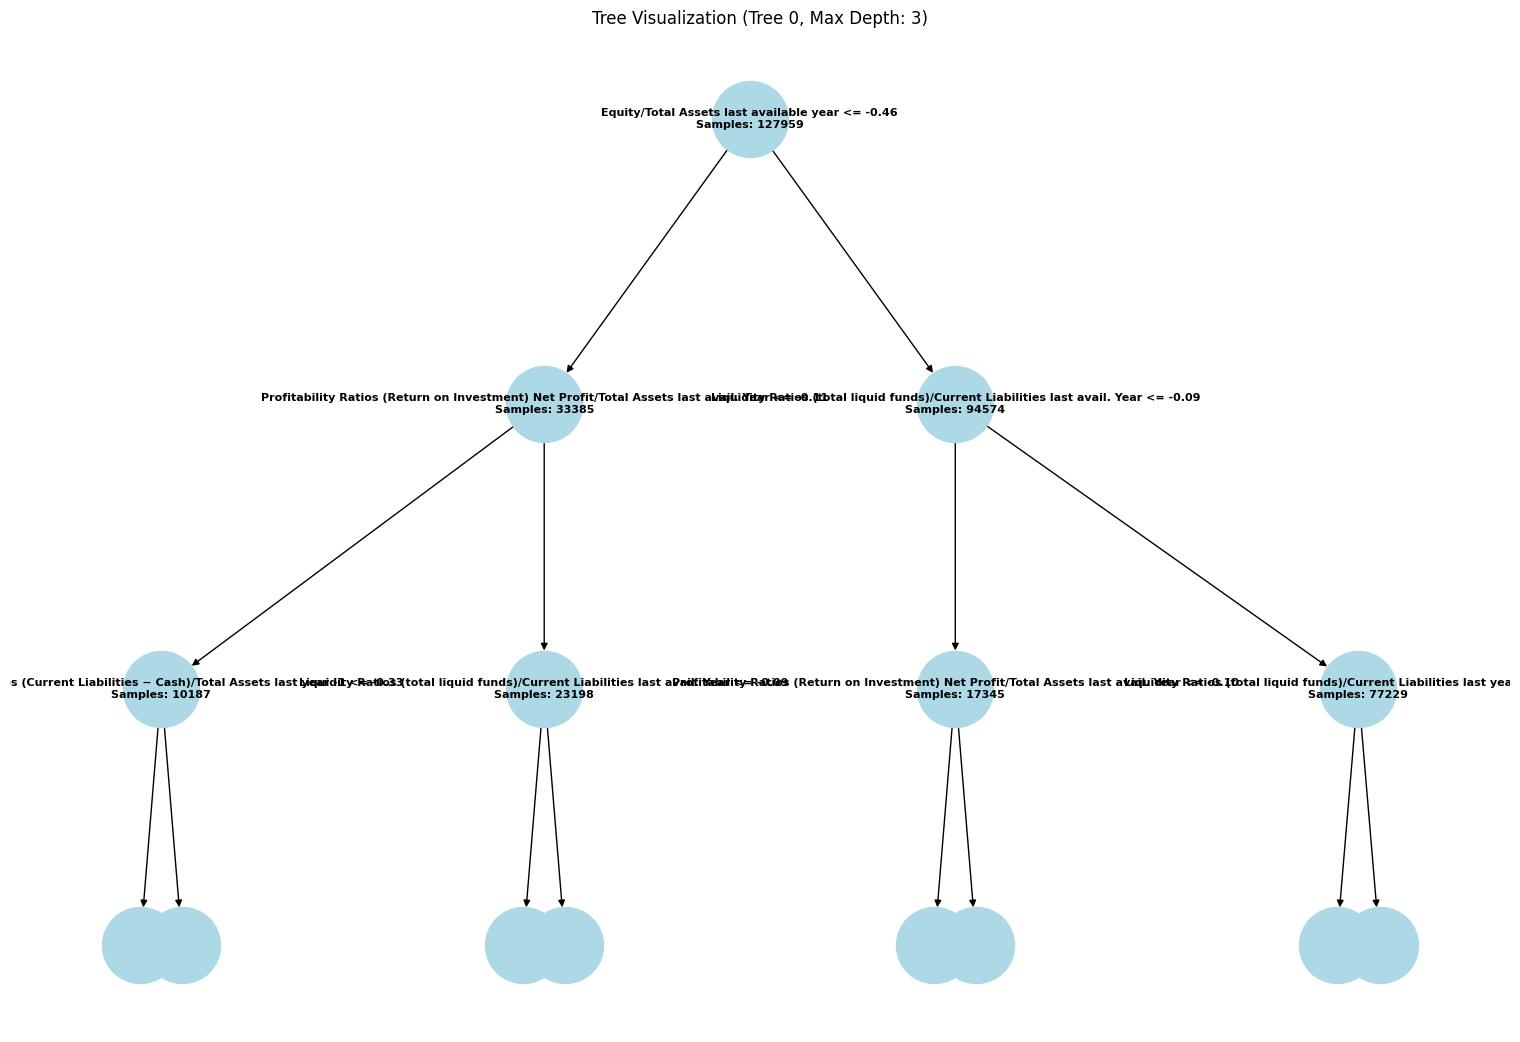

In [21]:
plot_tree_graph(models["Decision Tree depth 10"], feature_names, max_depth=3)
